Práctica 7: Clustering <br/>
Análisis de Grandes Volúmenes de Datos CI- <br />
Profesor: Allan Berrocal <br />
Estudiante: Carlos Espinoza

# Preparación del Dataset

In [41]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [18]:
dataframe = pd.read_csv("ClusterData.csv")

In [19]:
dataframe.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [20]:
dataframe.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [21]:
dataframe.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# K-Means

In [22]:
model = KMeans(3)

model.fit(dataframe)

labels = model.predict(dataframe)

labelsDF = pd.DataFrame(labels)

In [23]:
labelsDF.head(10)

,0
0,0
1,0
2,2
3,1
4,0
5,0
6,0
7,1
8,0
9,1


In [24]:
KMeansDF = dataframe.copy()
KMeansDF.insert(dataframe.shape[1], "Cluster ID", labelsDF)

In [25]:
KMeansDF.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster ID
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,0
5,100000006,0,0,35,1,144848,0,0,0
6,100000007,0,0,53,1,156495,1,1,0
7,100000008,0,0,35,1,193621,2,1,1
8,100000009,0,1,61,2,151591,0,0,0
9,100000010,0,1,28,1,174646,2,0,1


In [26]:
def getClusters(dataframe):
	
	numberOfClusters = dataframe["Cluster ID"].unique()
	clusters = list()
	for i in numberOfClusters:
		cluster = dataframe[dataframe["Cluster ID"] == i]
		clusters.append(cluster)

	return clusters

singleClusters = getClusters(KMeansDF)



In [27]:
def plotCluster(df, labels, clusters):
	dataframe = np.array(df)
	for cluster in clusters:
		# get row indexes for samples with this cluster
		row_ix = where(labels == cluster)
		# create scatter of these samples
		pyplot.scatter(dataframe[row_ix, 0], dataframe[row_ix, 1])
	# show the plot
	pyplot.show()


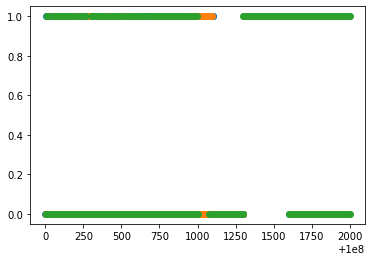

In [28]:
plotCluster(KMeansDF, labels, unique(labels))

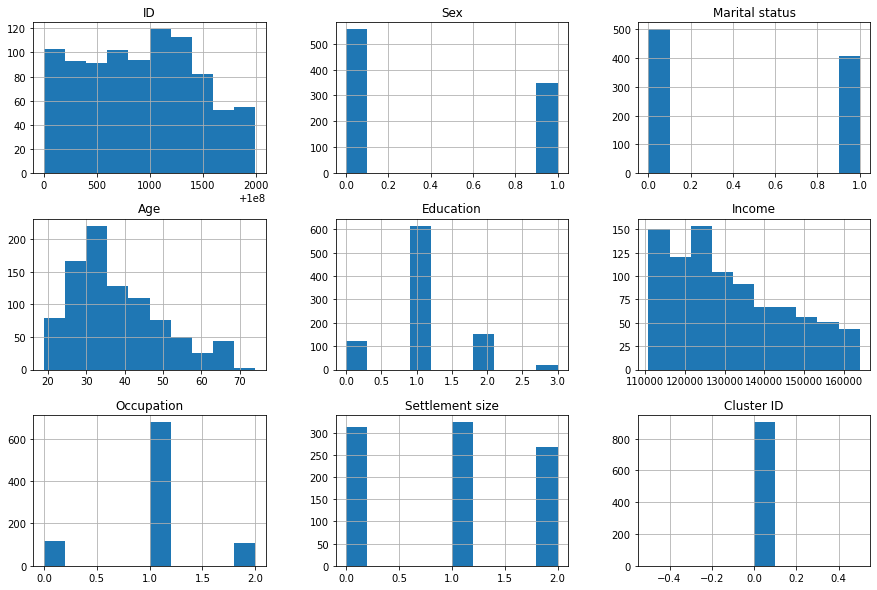

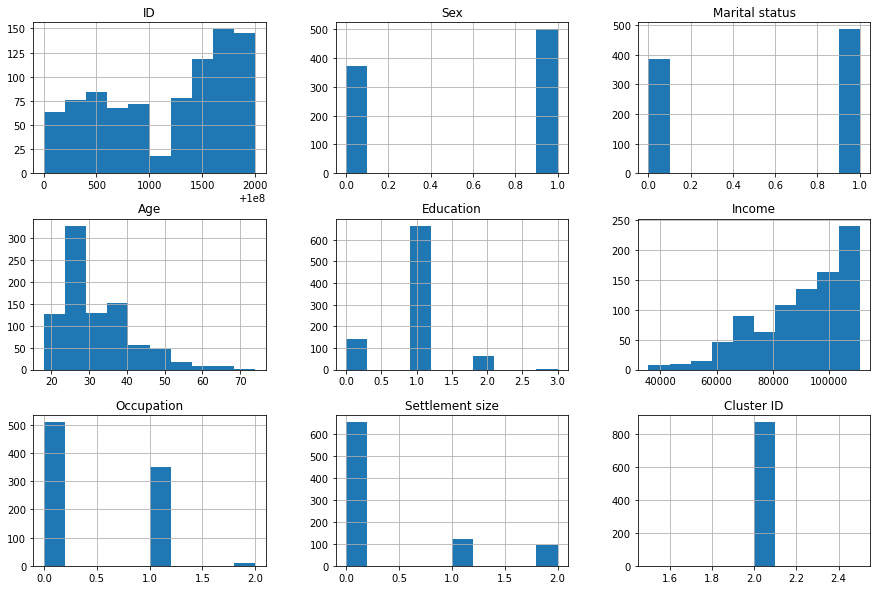

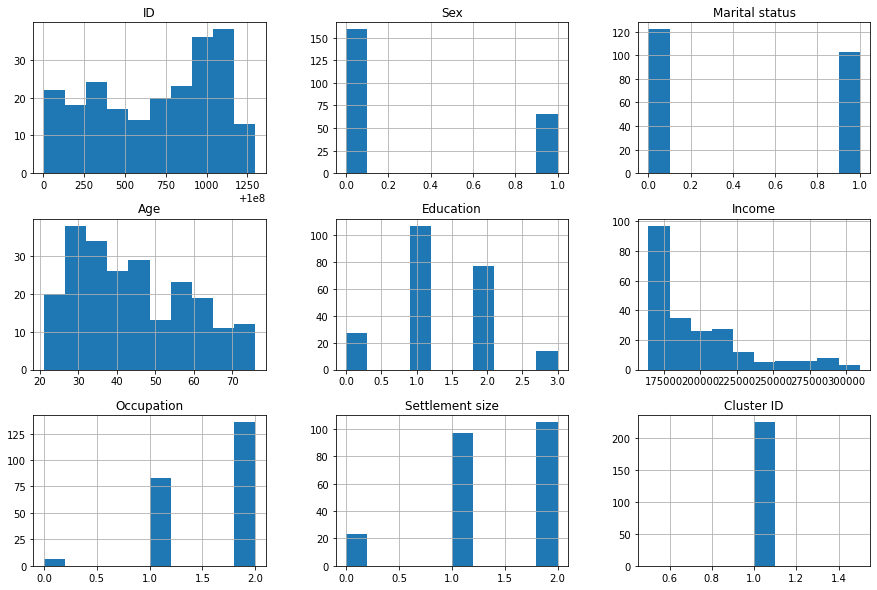

In [29]:
def getSummaryPlots(dataframe):
	for i in dataframe["Cluster ID"].unique():
		dataframe[dataframe['Cluster ID'] == i].hist(figsize = (15,10))
plt.show()


getSummaryPlots(KMeansDF)

## Análisis de las gráficas

Al utilizar el algoritmo de k-means, podemos especificar cuántas agrupaciones queremos obtener. Como se muestra en las gráficas, este algoritmo logró diferenciar y clasificar los datos en 3 conjuntos. Se puede interpretar que:

- El grupo 0 está conformado en su mayoría por hombres entre los 25 y 40 años de edad que no se encuentran casadas y reciben ingresos anuales entre los 100K y los 130K

- El grupo 1 en su mayoría son hombres que reciben 175k en ingresos que en su mayoría tienen el colegio y la universidad como grado de educación y viven en zonas de ciudad grandes

- El grupo 2 en su mayoría son mujeres casadas entre los 20 y 40 años con un salario que no supera los 100K. La mayoría se encuentra desempleada sin habilidades para desempeñar un trabajo y viven en ciudades pequeñas.

# Gaussian Mixture

In [46]:
#model = DBSCAN(eps = 0.50, min_samples=900)
model = GaussianMixture(n_components = 3)
labels = model.fit_predict(dataframe)
labelsDF = pd.DataFrame(labels)

DBSCANDF = dataframe.copy()
DBSCANDF.insert(dataframe.shape[1], "Cluster ID", labelsDF)

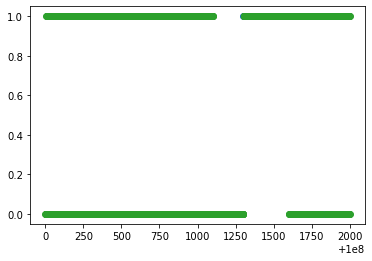

In [47]:
plotCluster(DBSCANDF, labels, unique(labels))

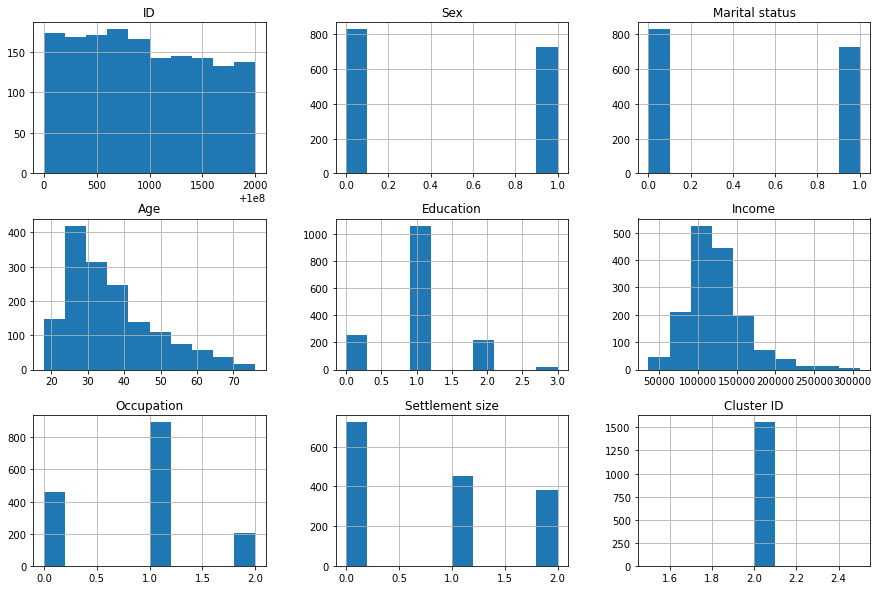

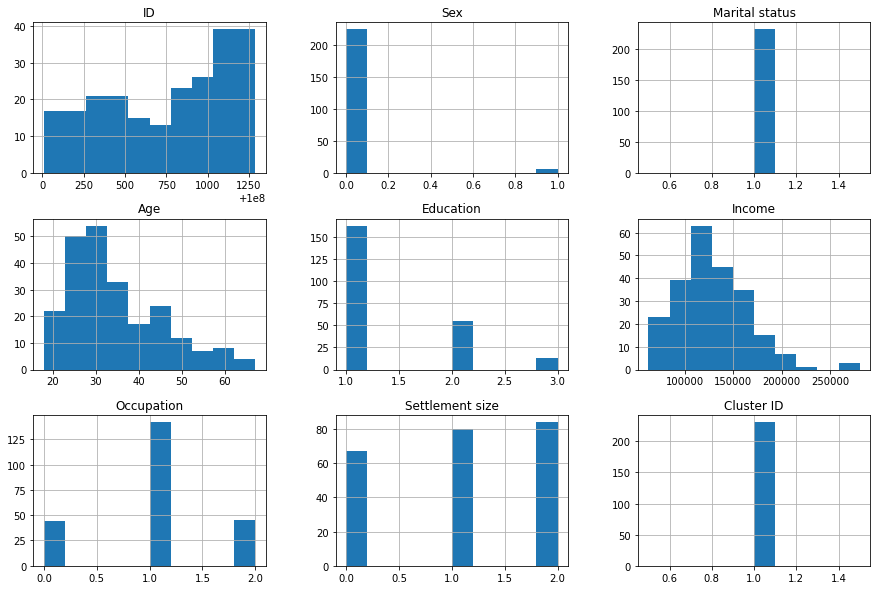

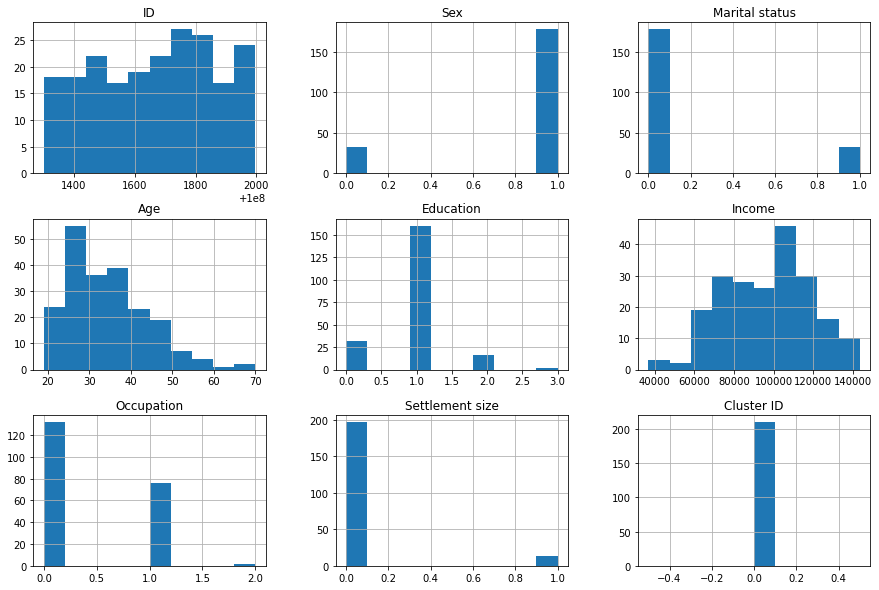

In [48]:
getSummaryPlots(DBSCANDF)

# Análisis de Gaussian Mixture

Se realizaron 3 agrupaciones:

- Grupo 0: en su mayoría son mujeres solteras entre los 20 y 40 años de edad. Terminaron el colegio, la mayoría está desempleada y viven en ciudades pequeñas

- Grupo 1: En su mayoría son hombres, en su mayoría son de alrededor de los 30 años y se encuentran casados. Terminaron el colegio y algunos la universidad. La mayoría trabaja con una salario promedio superior a los 100K. Viven en los 3 tipos de zonas

- Grupo 2: Este grupo es el resultante de los que no se lograron clasificar entre el 0 y el 1, podemos ver como los datos son promedios y cuesta determinar cual es la tendencia que llevó a realizar la categorización. 

# **Modificación de Parámetros**

# K-Means

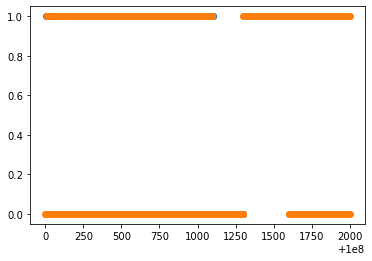

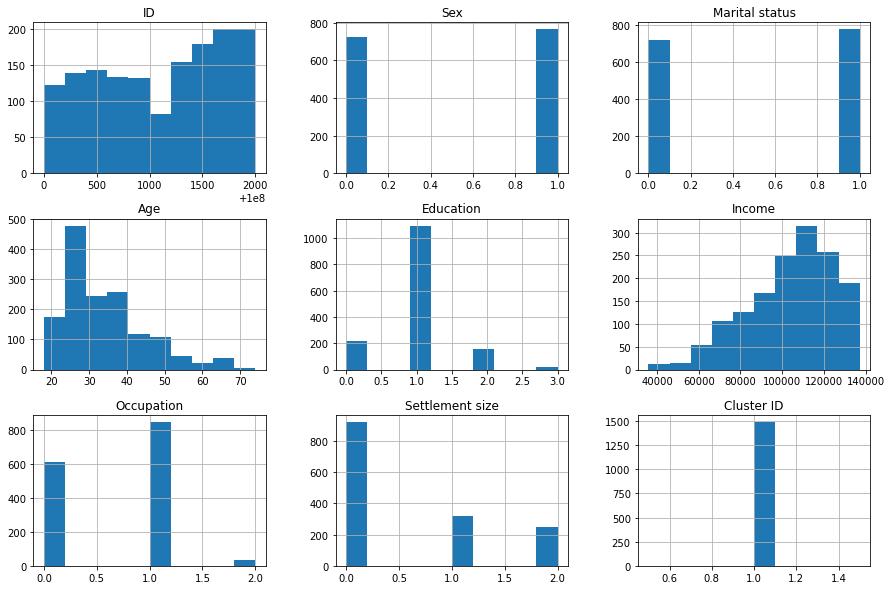

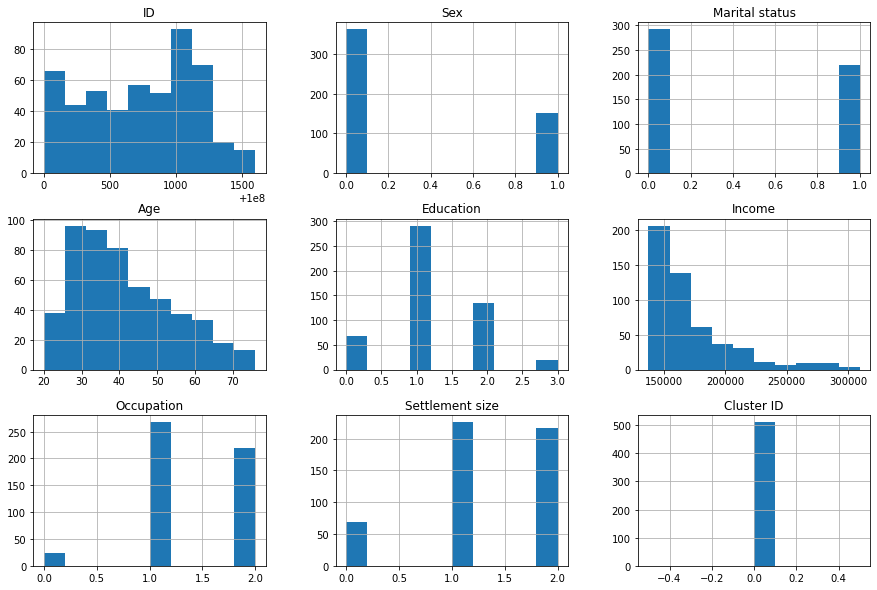

In [54]:
model = KMeans(2)
model.fit(dataframe)

labels = model.predict(dataframe)
labelsDF = pd.DataFrame(labels)

KMeansDF = dataframe.copy()
KMeansDF.insert(dataframe.shape[1], "Cluster ID", labelsDF)

plotCluster(KMeansDF, labels, unique(labels))
getSummaryPlots(KMeansDF)

## Análisis K-Means modificado

Al modificar la cantidad de cluster sugeridos vemos como las características que permiten realizar la categorización, cambian:

- Grupo 0: En su mayoría son hombres que ganan 140K+ al año, son mayores de 30 en su mayoría. Se encuentran empleados, terminaron el colegio y algunos la universidad.

- Grupo 1: La mayoría son personas jóvenes menores a 30 años. No ganan más de 150K al año. Pocos terminaron la universidad y una gran cantidad de ellos se encuentran desempleados.

# Gaussian Mixture

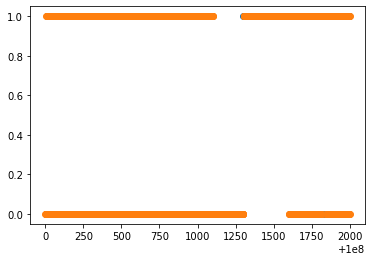

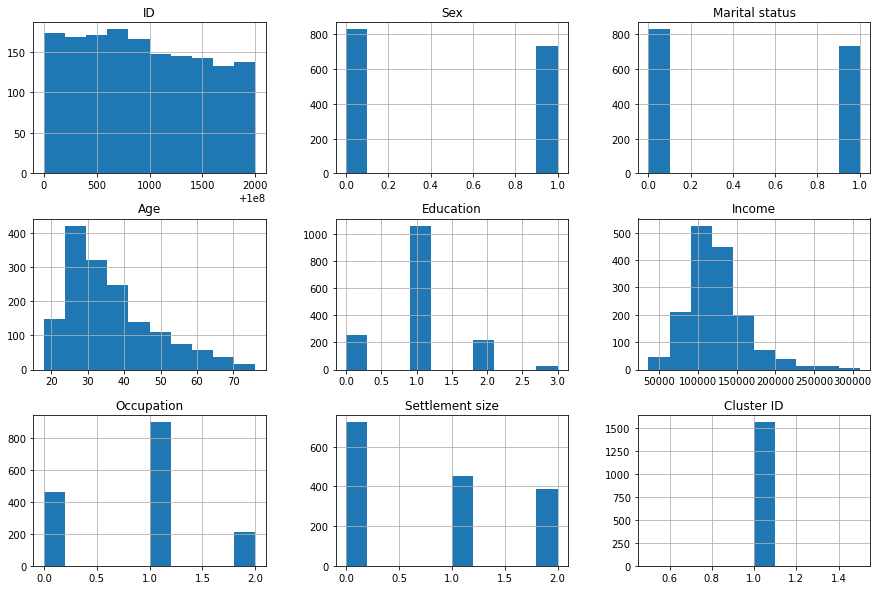

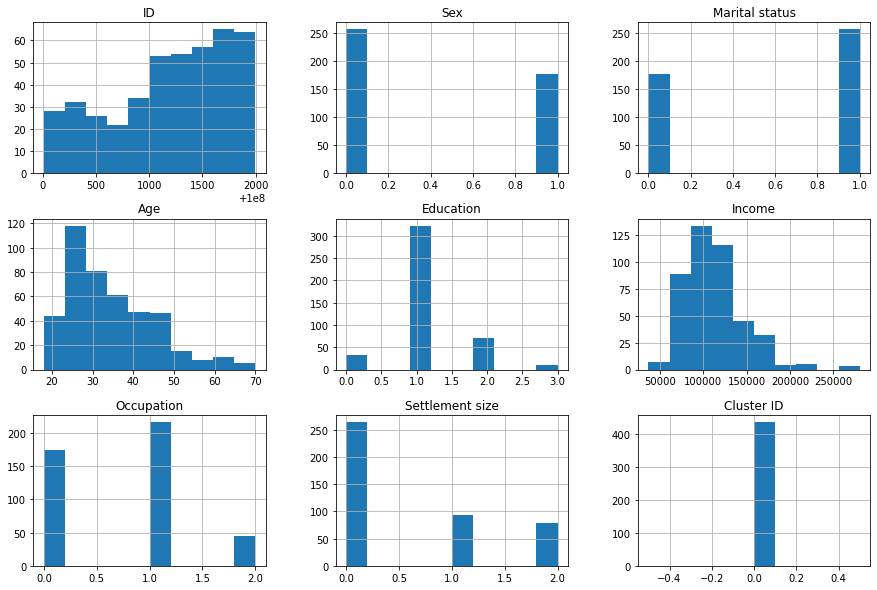

In [61]:
model = GaussianMixture(n_components = 2)
labels = model.fit_predict(dataframe)
labelsDF = pd.DataFrame(labels)

DBSCANDF = dataframe.copy()
DBSCANDF.insert(dataframe.shape[1], "Cluster ID", labelsDF)

plotCluster(DBSCANDF, labels, unique(labels))
getSummaryPlots(DBSCANDF)

## Análisis de las gráficas

Al cambiar la cantidad de agrupaciones esperadas, podemos notar como este algoritmo no es tan efectivo para determinar clases como lo es el K-Means. Se observan las agrupaciones:

- Grupo 0: Donde la mayoría son mujeres casadas entre los 20 y 40 años con el colegio completo y la mayoría gana un salario anual menor a los 100K. Gran parte de ellas este grupo se encuentra desempleado y viven en zonas de ciudades pequeñas

- Grupo 1: En su mayoría son hombres, solteros, con una ingreso anual mayor a los 100K. Cuentan con el colegio completo y una cantidad significativa tiene estudios superiores. Se encuentran empleados y una gran porción tiene puestos importantes

# Resumen Del Tutorial

## Clustering

Es una técnica de aprendizaje no supervisado que aplica cuando no hay clases para ser predecidas sino que se necesita hacer divisiones por grupos naturales. Es, generalmente, un área de densidad de un feature donde las observaciones se encuentran más juntas con respecto a unas que a otros. Estos clusters pueden tener un centro que se llama Centroide.

Clustering puede ser una buena técnica para darnos una idea del tipo de datos con los que estamos trabajando. La evaluación de un cluster puede ser subjetiva.

## Clustering Algorithms

Muchos de los algoritmos de clustering usan la distancia o alguna otra medida para encontrar las áreas de alta densidad dentro de un feature. Es buena práctica escalar los datos precio a la aplicación de un algoritmo

Algunos de los algoritmos necesitan una entrada que les diga cual es la cantidad de agrupaciones que necesita. Algunos de los algoritmos más utilizados son:

- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

